# Project: FBI GUN DATA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset shows the number of permits granted to gun holders across the US. It comprises of a monthly log, the type of guns, and dstribution accross states.  


### Question(s) for Analysis
The following questons were attributed to the dataset;
1. Which state have had the highest growth in gun registrations
2. What is the overall trend of gun purchases?

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.4MB/s eta 0:00:01  4% |█▋                              | 512kB 11.9MB/s eta 0:00:01    15% |█████                           | 1.6MB 13.8MB/s eta 0:00:01    20% |██████▋                         | 2.2MB 13.1MB/s eta 0:00:01    26% |████████▍                       | 2.7MB 12.1MB/s eta 0:00:01    36% |███████████▊                    | 3.8MB 11.7MB/s eta 0:00:01    42% |█████████████▌                  | 4.4MB 12.2MB/s eta 0:00:01    47% |███████████████▏                | 4.9MB 10.7MB/s eta 0:00:01    63% |████████████████████▍           | 6.6MB 11.0MB/s eta 0:00:01    69% |██████████████████████▏         | 7.2MB 29.4MB/s eta 0:00:01    74% |████████████████████████        | 7.8MB 13.3MB/s eta 0:00:01    85% |███████████████████████████▎    | 8.9MB 8.9MB/s eta 0:00:01    96% |██████████████████████████████▉ | 10.1MB 12.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01  0% |▎                           

<a id='wrangling'></a>
## Data Wrangling


ANALYSING DATA FOR GUNS:

In [19]:
guns = pd.read_excel('gun-data.xlsx')
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

From the information above, we can see from the data structure that;
1. The dataset shoows a 12485 rows and 27 columns.
2. Several columns have missing data
3. The month data type is an object and not a datetime data type
4. The column head for the datetime should be renamed date

In [20]:
guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


A statistical overview of the dataset showing a distribution of permits from the minimum value to the maximum with and average of about 6400 permits.

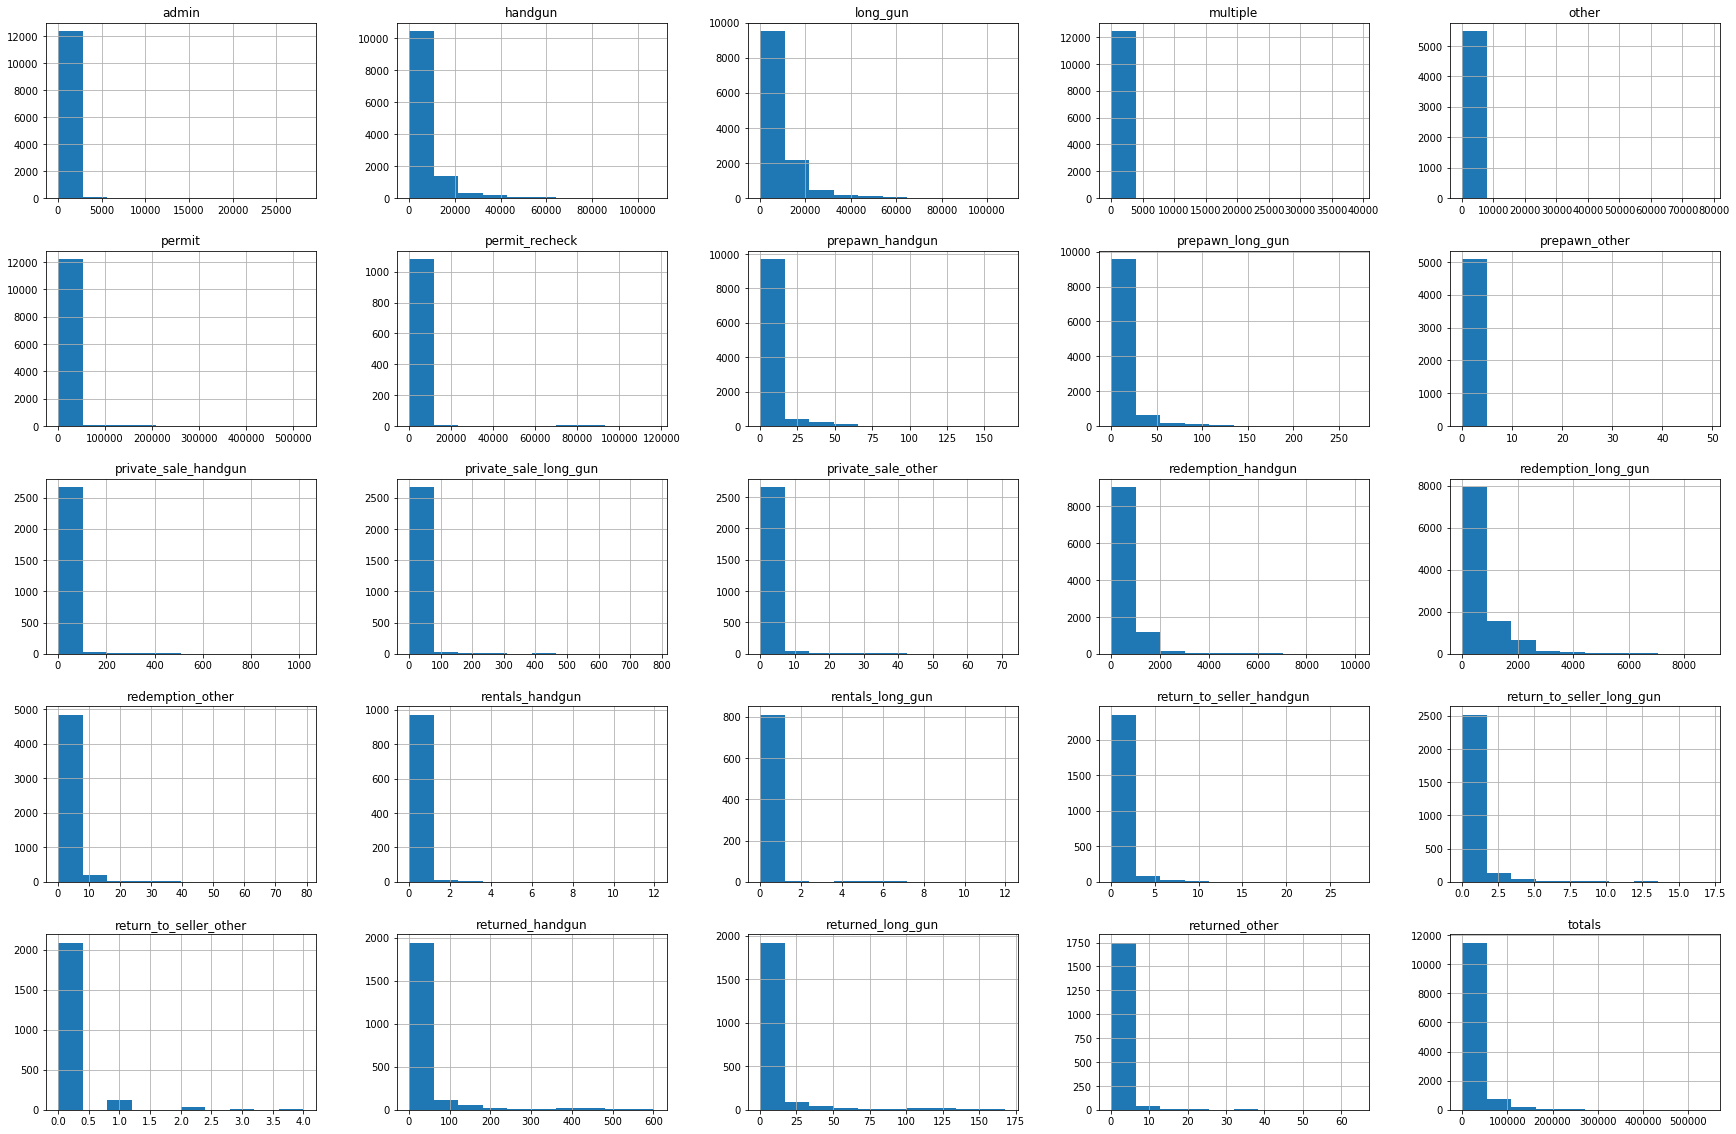

In [21]:
guns.hist(figsize= (30,20));

In [ ]:
A section showing the level of skewness across fields on the dataset


In [22]:
guns.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

The data shows a presence of null values across most fields. 


### Data Cleaning


In [23]:
guns.rename(columns ={'month' : 'date'}, inplace= True)

guns['date']= pd.to_datetime(guns['date'])

The first line of code  renamed the month-column to a date-column.
The second code converted the column from an object type to a datetime type.

In [24]:

guns.drop(["admin","totals"], axis= 1,inplace= True)

guns.dropna(inplace= True)


Two columns were dropped as they had no significant input on the data set. Also dropped were the null values.

In [27]:
guns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Data columns (total 25 columns):
date                         770 non-null datetime64[ns]
state                        770 non-null object
permit                       770 non-null float64
permit_recheck               770 non-null float64
handgun                      770 non-null float64
long_gun                     770 non-null float64
other                        770 non-null float64
multiple                     770 non-null int64
prepawn_handgun              770 non-null float64
prepawn_long_gun             770 non-null float64
prepawn_other                770 non-null float64
redemption_handgun           770 non-null float64
redemption_long_gun          770 non-null float64
redemption_other             770 non-null float64
returned_handgun             770 non-null float64
returned_long_gun            770 non-null float64
returned_other               770 non-null float64
rentals_handgun              770 non-null

Earlier operations reduced the dataset from an initial 12485 entries to 770 entries.


In [26]:

df1=guns.groupby(['state'])['permit'].mean()
df1

state
Alabama                  21768.500000
Alaska                     248.071429
Arizona                   7592.857143
Arkansas                  3499.357143
California               60371.785714
Colorado                  5572.214286
Connecticut               7327.214286
Delaware                   579.285714
District of Columbia        11.642857
Florida                  21983.285714
Georgia                  16790.500000
Guam                         0.000000
Hawaii                    1106.071429
Idaho                     4708.142857
Illinois                 16195.071429
Indiana                  34484.142857
Iowa                      9652.714286
Kansas                    2296.500000
Kentucky                323290.071429
Louisiana                 2998.571429
Maine                      665.071429
Mariana Islands              0.000000
Maryland                  2880.571429
Massachusetts             8317.357143
Michigan                 18774.928571
Minnesota                36444.571429
Missis

Grouped dataset by state with respect to their average permit value.

<a id='eda'></a>
## Exploratory Data Analysis



### What state had the highest growth in gun registrations?

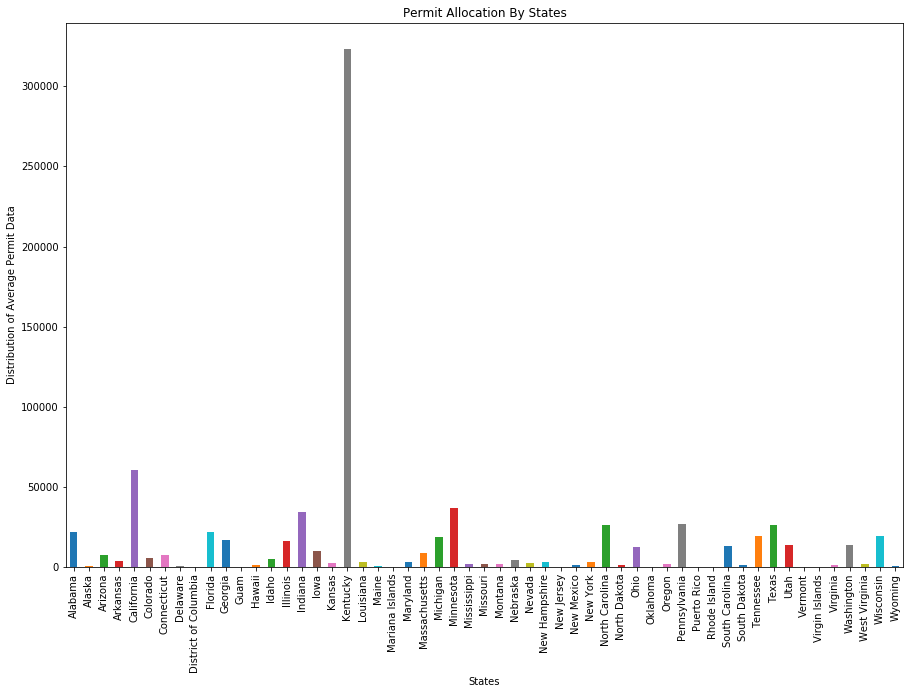

In [28]:
df1.plot.bar(x='states', y = 'permit', figsize=(15, 10));

plt.title('Permit Allocation By States');
plt.xlabel('States');
plt.ylabel('Distribution of Average Permit Data');


Kentucky stands out with the highest rate of gun permits with about 9 states having little or no permit. 


### What is the overall trend of gun purchases?

In [29]:
trend= guns.groupby('date')['permit'].mean()
trend

date
2016-08-01     9869.490909
2016-09-01    13536.581818
2016-10-01    15615.909091
2016-11-01    14602.872727
2016-12-01    15311.890909
2017-01-01    16585.818182
2017-02-01    15206.018182
2017-03-01    17194.818182
2017-04-01    15225.927273
2017-05-01    15108.418182
2017-06-01    14557.363636
2017-07-01    13725.818182
2017-08-01    14363.509091
2017-09-01    13847.672727
Name: permit, dtype: float64

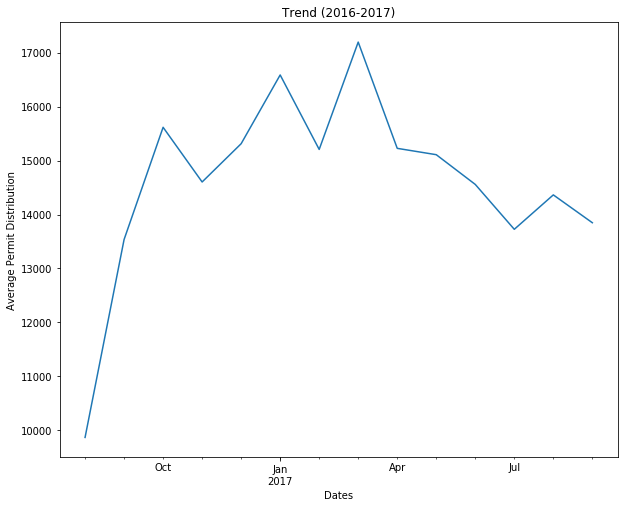

In [30]:
trend.plot.line(x= 'date', y= 'permit',figsize=(10, 8));

plt.title('Trend (2016-2017)');
plt.xlabel('Dates');
plt.ylabel('Average Permit Distribution');

A rise in permits over two years from August, 2016 to a fall in numbers in September, 2017.

<a id='conclusions'></a>
## Conclusions

The data from above has shown that the state with the highest registration for permit was Kentucky with a average distribution of 323290.071429 permits.
On the other hand, the average data for over two years(2016-2017) shows a sharp rise in permits issuance from and initial 9000 in August,2016 to 15000. The demand further rose in March,2017 hitting a high of 17000
and gradually dropping over time to 13000 in the month of September of the same year.


## Limitation
The dataset failed to show us the level of insecurity across the states. This would have given us a pointer as to why some states had higher permit ratings than others. Also we would have been able to map out a geographical spread of this possible security risk zones within the year these data were collated.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0